In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("AQI Data Set.csv")

# Preview and check structure
print(df.head())
print(df.info())
print(df.describe(include='all'))


   Id Mounths  PM10 in æg/m3  SO2 in æg/m3  NOx  in æg/m3   PM2.5  in æg/m3  \
0   1  Jan-17          174.0          26.4           35.0                79   
1   2  Feb-17          143.0          35.1           40.3                75   
2   3  Mar-17          142.0          32.1           30.9                59   
3   4  Apr-17          117.0          50.9           36.3                75   
4   5  May-17            NaN          41.6           25.2                53   

   Ammonia - NH3  in æg/m3  O3   in æg/m3  CO  in mg/m3   Benzene  in æg/m3  \
0                     25.0          107.6           0.9                 0.7   
1                     31.0          103.0           0.9                 0.9   
2                     26.0           80.7           0.8                 0.5   
3                     36.0           79.5           0.9                 0.7   
4                     28.0           70.0           0.5                 0.5   

     AQI  
0  149.0  
1  129.0  
2  128.0  
3  111

In [2]:
# Drop duplicates
df = df.drop_duplicates()

# Check for missing values
print(df.isnull().sum())

# Optionally drop or fill missing values
df = df.dropna()  # or df.fillna(method='ffill')

# Convert date column if available
# df['Date'] = pd.to_datetime(df['Date'])  # Uncomment if date exists


Id                         0
Mounths                    0
PM10 in æg/m3              6
SO2 in æg/m3               1
NOx  in æg/m3              2
 PM2.5  in æg/m3           0
Ammonia - NH3  in æg/m3    0
O3   in æg/m3              0
CO  in mg/m3               0
 Benzene  in æg/m3         0
AQI                        5
dtype: int64


In [3]:
# View data types
print(df.dtypes)

# Convert types if needed
# df['AQI'] = df['AQI'].astype(float)


Id                           int64
Mounths                     object
PM10 in æg/m3              float64
SO2 in æg/m3               float64
NOx  in æg/m3              float64
 PM2.5  in æg/m3             int64
Ammonia - NH3  in æg/m3    float64
O3   in æg/m3              float64
CO  in mg/m3               float64
 Benzene  in æg/m3         float64
AQI                        float64
dtype: object


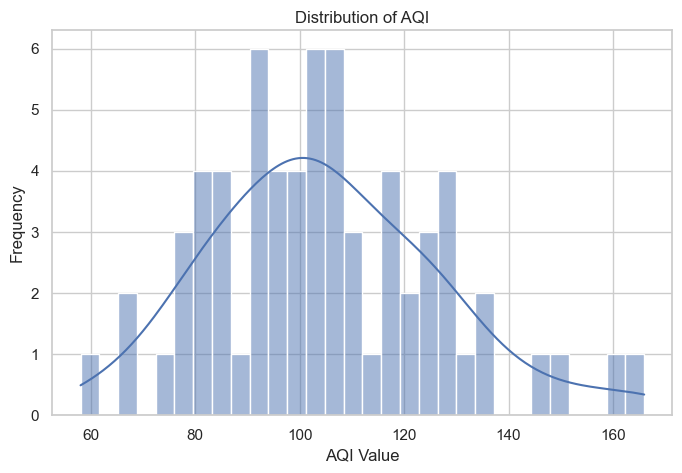

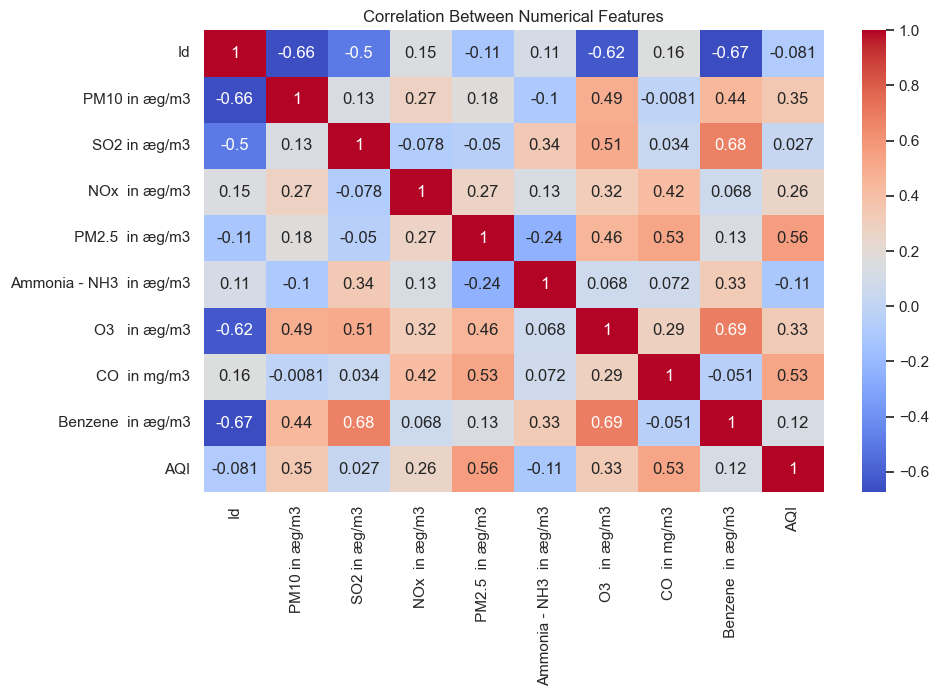

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Distribution of AQI
plt.figure(figsize=(8, 5))
sns.histplot(df['AQI'], bins=30, kde=True)
plt.title("Distribution of AQI")
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.show()

# 2. AQI by City (if available)
if 'City' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='City', y='AQI')
    plt.title("AQI Distribution by City")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3. Correlation Heatmap (if multiple numeric columns)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("AQI Data Set.csv")

# Drop duplicates
df = df.drop_duplicates()

# Drop rows with any missing values
df = df.dropna()

# Reset index
df.reset_index(drop=True, inplace=True)

# Save cleaned data
df.to_csv("AQI_Data_Cleaned.csv", index=False)

# Confirm the clean result
print(f"Shape after cleaning: {df.shape}")
df.head()


Shape after cleaning: (66, 11)


,Id,Mounths,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
0,1,Jan-17,174.0,26.4,35.0,79,25.0,107.6,0.9,0.7,149.0
1,2,Feb-17,143.0,35.1,40.3,75,31.0,103.0,0.9,0.9,129.0
2,3,Mar-17,142.0,32.1,30.9,59,26.0,80.7,0.8,0.5,128.0
3,4,Apr-17,117.0,50.9,36.3,75,36.0,79.5,0.9,0.7,111.0
4,7,Jul-17,111.0,38.9,21.5,29,30.0,24.4,0.3,0.7,106.7


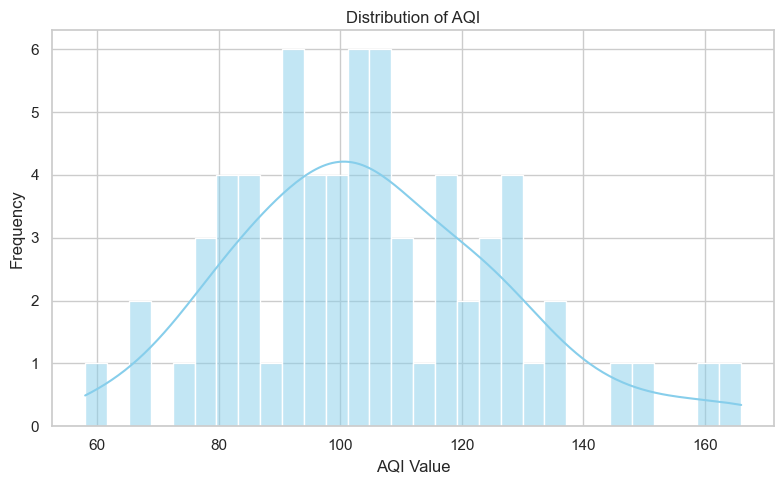

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['AQI'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of AQI")
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [8]:
if 'City' in df.columns:
    top_cities = df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_cities.values, y=top_cities.index, palette="Reds_r")
    plt.title("Top 10 Cities with Highest Average AQI")
    plt.xlabel("Average AQI")
    plt.ylabel("City")
    plt.tight_layout()
    plt.show()


In [9]:
# Convert date if present
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month

    monthly_avg = df.groupby('Month')['AQI'].mean()

    plt.figure(figsize=(8, 5))
    sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
    plt.title("Monthly Average AQI Trend")
    plt.xlabel("Month")
    plt.ylabel("Average AQI")
    plt.xticks(range(1,13))
    plt.tight_layout()
    plt.show()


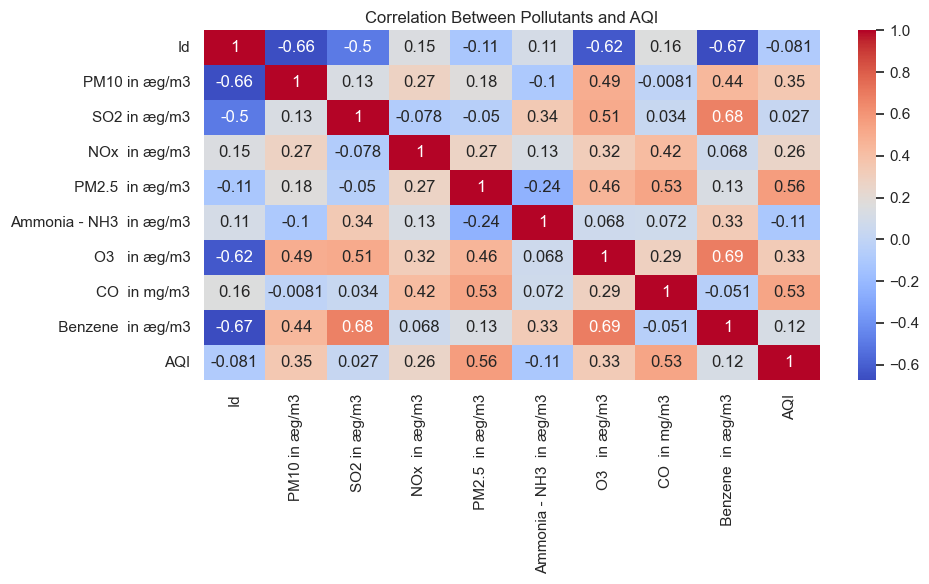

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Pollutants and AQI")
plt.tight_layout()
plt.show()


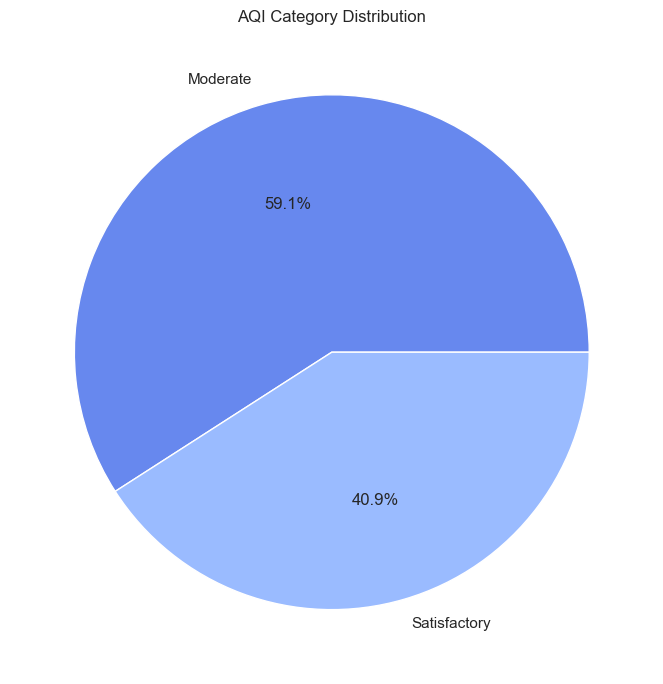

In [11]:
def categorize_aqi(value):
    if value <= 50:
        return "Good"
    elif value <= 100:
        return "Satisfactory"
    elif value <= 200:
        return "Moderate"
    elif value <= 300:
        return "Poor"
    elif value <= 400:
        return "Very Poor"
    else:
        return "Severe"

df['AQI_Category'] = df['AQI'].apply(categorize_aqi)

# Pie Chart of AQI Categories
plt.figure(figsize=(7, 7))
df['AQI_Category'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('coolwarm', 6))
plt.title("AQI Category Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()


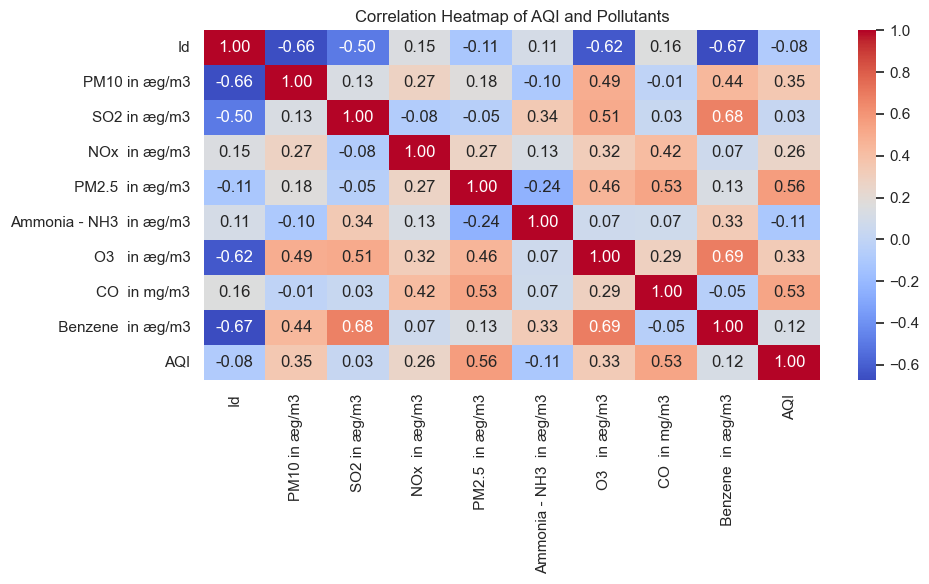

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Full heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of AQI and Pollutants")
plt.tight_layout()
plt.show()


C:\Users\gampa\AppData\Local\Temp\ipykernel_40132\459366705.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aqi_corr.values, y=aqi_corr.index, palette="Reds")


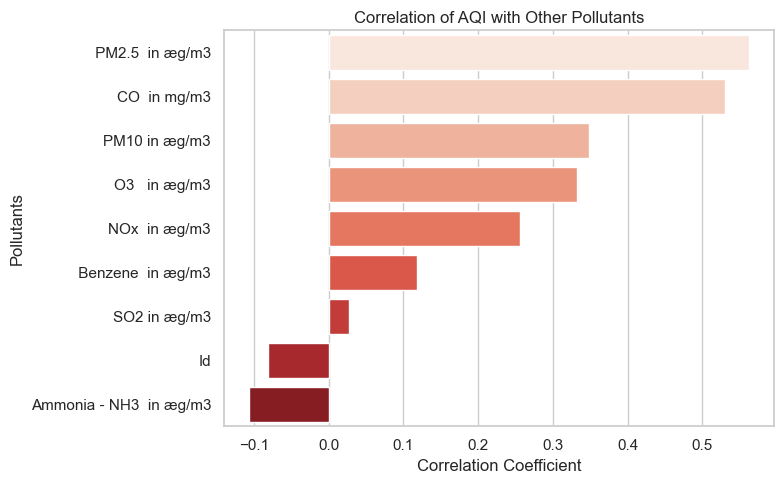

In [13]:
# Get only correlation with AQI, excluding itself
aqi_corr = corr_matrix['AQI'].drop('AQI').sort_values(ascending=False)

# Bar plot of AQI correlations
plt.figure(figsize=(8, 5))
sns.barplot(x=aqi_corr.values, y=aqi_corr.index, palette="Reds")
plt.title("Correlation of AQI with Other Pollutants")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Pollutants")
plt.tight_layout()
plt.show()
